# Phase 1 - Data Collection and Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 - Data Collection and Preprocessing

In [2]:
data = pd.read_csv('employee_data.csv')

In [3]:
data

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [5]:
# Checking for missing values and null values
data.isna().sum()

,0
EmployeeID,0
Name,0
Age,0
Department,0
Salary,0
YearsAtCompany,0
PerformanceScore,0
Attrition,0


In [6]:
data.isnull().sum()

,0
EmployeeID,0
Name,0
Age,0
Department,0
Salary,0
YearsAtCompany,0
PerformanceScore,0
Attrition,0


In [7]:
data['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
# Checking for Duplicates
duplicated_series = data.duplicated()
print(duplicated_series)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [9]:
duplicated_series.unique()

array([False])

#### Observing the Data through graphs
##### Analysing the Outliers and Data Points

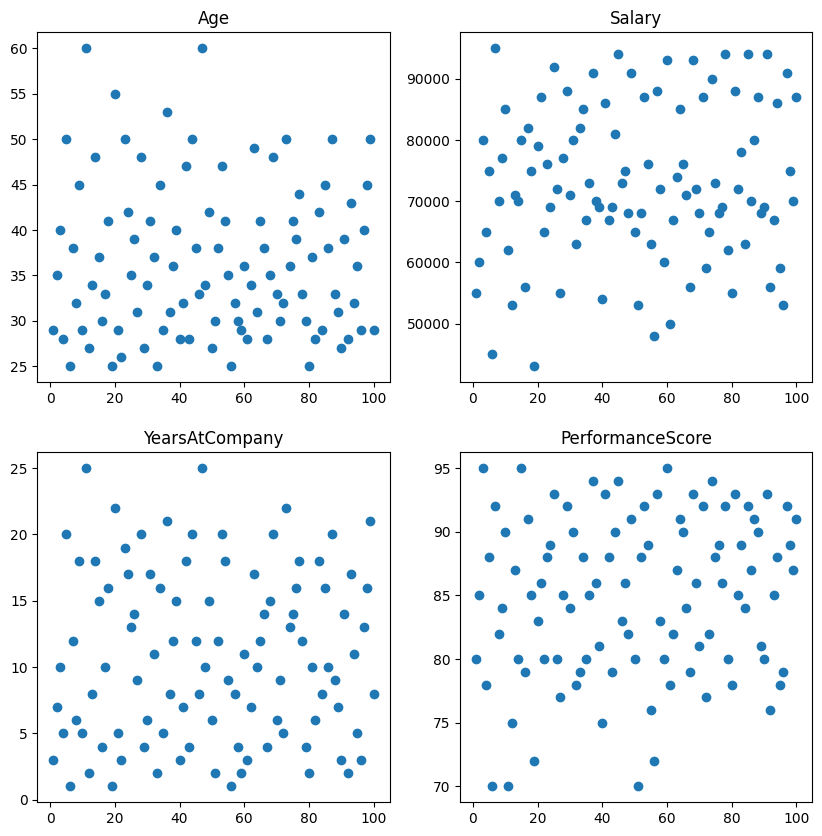

In [10]:
subplot_list = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
plt.figure(figsize=(10,10))
for i in range(len(subplot_list)):
    plt.subplot(2, 2, i+1)

    plt.scatter(data['EmployeeID'], data[subplot_list[i]])
    plt.title(subplot_list[i])


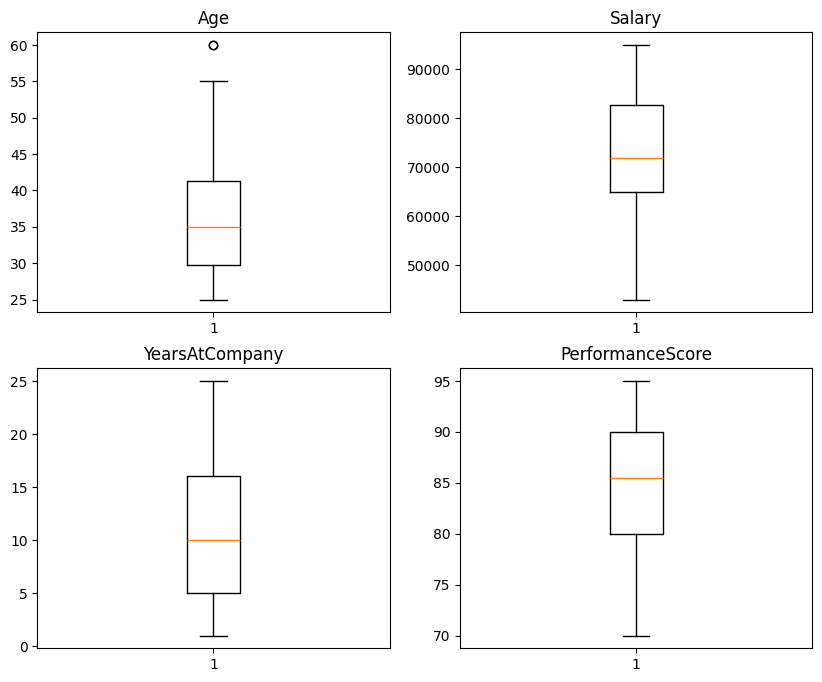

In [11]:
plt.figure(figsize=(10, 8))

for i in range(len(subplot_list)):
    plt.subplot(2, 2, i+1)
    plt.boxplot(data[subplot_list[i]])
    plt.title(subplot_list[i])


In [12]:
# Checking for Data Inconsistency

len(data['EmployeeID'].unique())

100

In [13]:
data['Department'].unique()

array(['Sales', 'HR', 'Engineering', 'Marketing'], dtype=object)

<Axes: xlabel='count', ylabel='Attrition'>

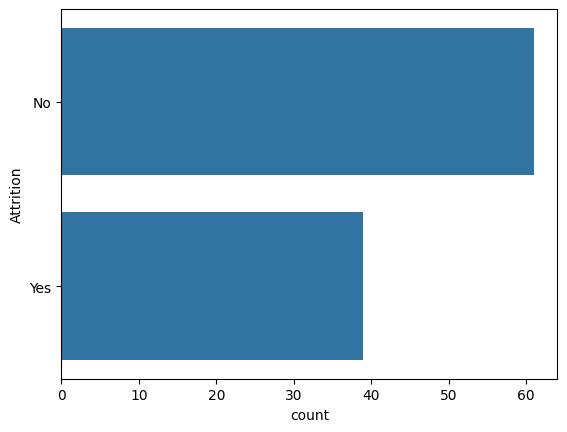

In [14]:
sns.countplot(data['Attrition'])

### Step 2 - Exploratory Data Analysis (EDA)

In [15]:
# Observing the statistical data

data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


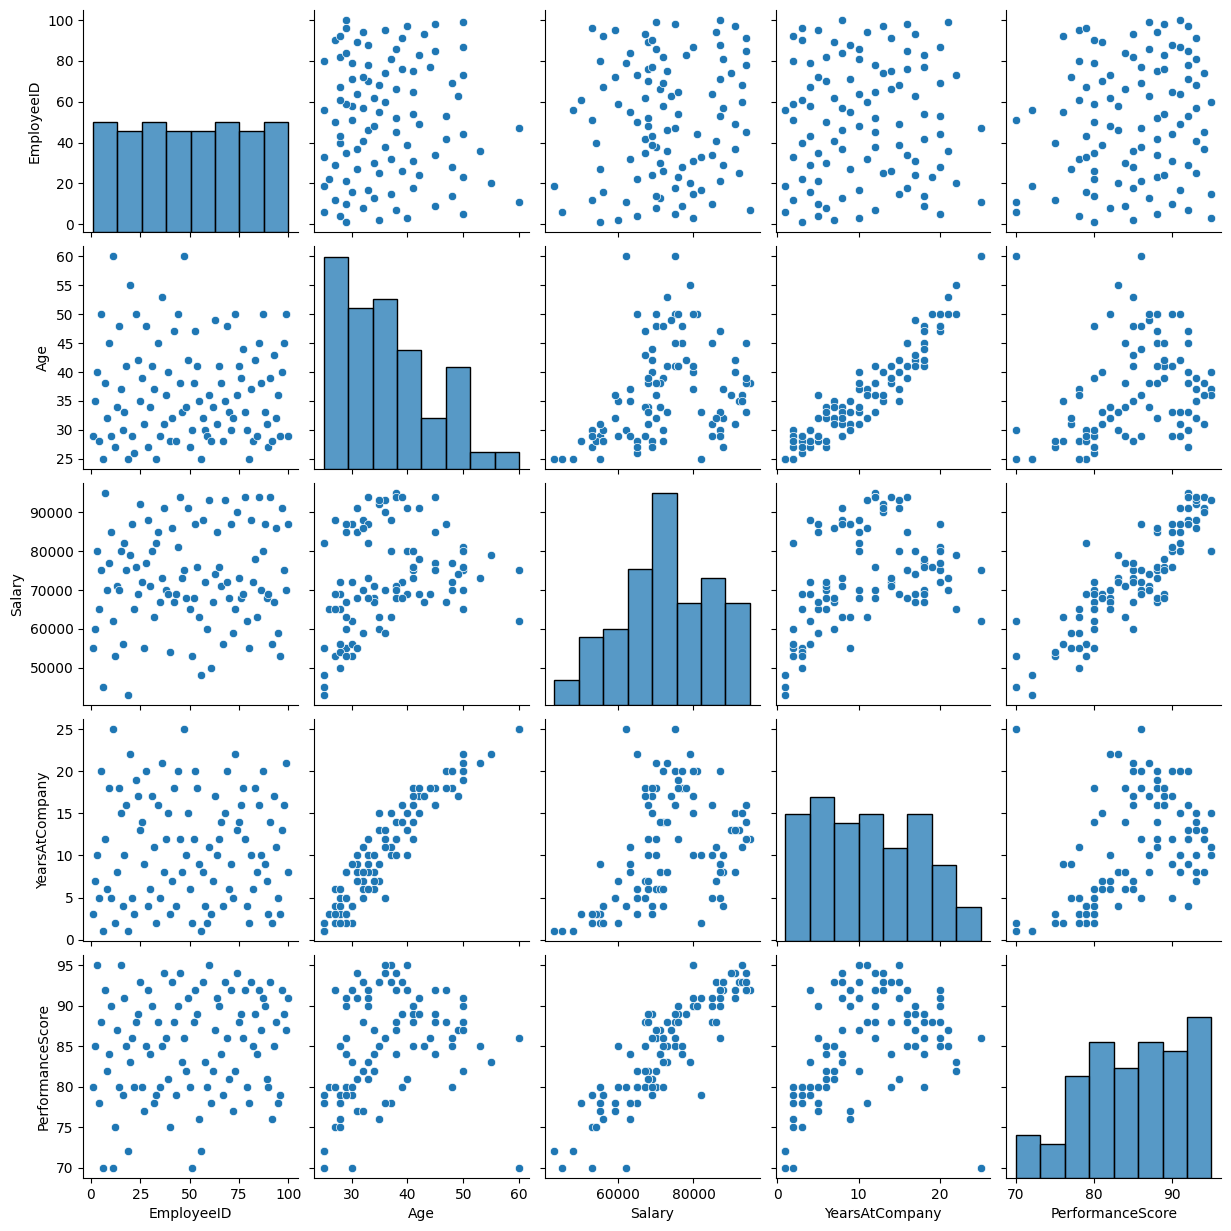

In [16]:
sns.pairplot(data)

In [17]:
numerical_cols_data = data[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']]
numerical_cols_data.corr()

,Age,Salary,YearsAtCompany,PerformanceScore
Age,1.000000,0.281416,0.946127,0.305288
Salary,0.281416,1.000000,0.413361,0.874773
YearsAtCompany,0.946127,0.413361,1.000000,0.443331
PerformanceScore,0.305288,0.874773,0.443331,1.000000


<Axes: >

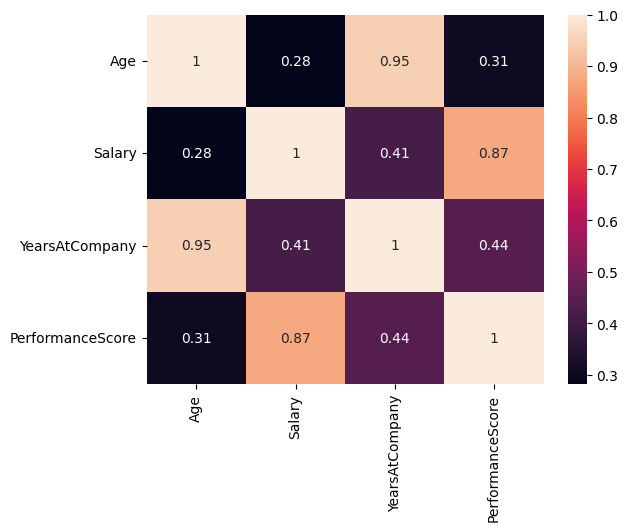

In [18]:
sns.heatmap(numerical_cols_data.corr(), annot = True)

### Step 3 - Probablity and Statistical Analysis

In [19]:
# First let us convert the Attribution Column to a numerical column

data['Attribution_Binary'] = data['Attrition'].map({"Yes" : 1, "No" : 0})

In [20]:
data

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,Attribution_Binary
0,1,John Doe,29,Sales,55000,3,80,No,0
1,2,Jane Smith,35,HR,60000,7,85,No,0
2,3,Michael Brown,40,Engineering,80000,10,95,Yes,1
3,4,Emily Davis,28,Marketing,65000,5,78,No,0
4,5,David Johnson,50,Sales,75000,20,88,Yes,1
...,...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No,0
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes,1
97,98,Michael Lewis,45,Sales,75000,16,89,No,0
98,99,Linda Young,50,HR,70000,21,87,Yes,1


In [21]:
# Lets Calculate the probability of Attrition by the Department
prob_attrition_by_dept = data.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())
print('\n',prob_attrition_by_dept)
percent_attrition_by_dept = (prob_attrition_by_dept * 100).round(2).astype(str) + "%"
print('\n',percent_attrition_by_dept)


 Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition, dtype: float64

 Department
Engineering    42.86%
HR             34.62%
Marketing       20.0%
Sales          53.85%
Name: Attrition, dtype: object


In [22]:
# Now calculate the probability of attrition by performance score (rounded-off)
prob_attrition_by_perf = data.groupby(data['PerformanceScore'].round())['Attrition'].apply(lambda x: (x == "Yes").mean())
print('\n', prob_attrition_by_perf)
percent_attrition_by_perf = (prob_attrition_by_perf * 100).round(2).astype(str) + '%'
print('\n', percent_attrition_by_perf)


 PerformanceScore
70    0.333333
72    0.000000
75    0.500000
76    0.000000
77    0.500000
78    0.600000
79    0.200000
80    0.111111
81    0.666667
82    0.000000
83    0.333333
84    0.500000
85    0.500000
86    0.400000
87    0.750000
88    0.428571
89    0.400000
90    0.200000
91    0.400000
92    0.571429
93    0.666667
94    0.333333
95    0.333333
Name: Attrition, dtype: float64

 PerformanceScore
70    33.33%
72      0.0%
75     50.0%
76      0.0%
77     50.0%
78     60.0%
79     20.0%
80    11.11%
81    66.67%
82      0.0%
83    33.33%
84     50.0%
85     50.0%
86     40.0%
87     75.0%
88    42.86%
89     40.0%
90     20.0%
91     40.0%
92    57.14%
93    66.67%
94    33.33%
95    33.33%
Name: Attrition, dtype: object


In [23]:
# Aplpying Bayes' Theorem

# Example for Performance Score = 93
target_score = 93
p_attrition = (data['Attrition'] == 'Yes').mean()  # P(A)
p_perf_given_attr = data[data['Attrition'] == 'Yes']['PerformanceScore'].value_counts(normalize=True).get(target_score, 0)  # P(B|A)
p_perf = (data['PerformanceScore'] == target_score).mean()  # P(B)

# Bayes' Theorem
if p_perf > 0:
    p_attrition_given_perf = (p_perf_given_attr * p_attrition) / p_perf
    print(f"P(Attrition | Performance Score = {target_score}) using Bayes Theorem: {round(p_attrition_given_perf*100, 2)}%")
else:
    print(f"No employees with Performance Score = {target_score} found.")

print()

P(Attrition | Performance Score = 93) using Bayes Theorem: 66.67%



In [24]:
# 3. HYPOTHESIS TESTING (ANOVA) Since there more than 2 departments.

# Prepare data for ANOVA
departments = data['Department'].unique()
scores_by_dept = [data[data['Department'] == dept]['PerformanceScore'] for dept in departments]

# Run one-way ANOVA
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(*scores_by_dept)

print("Test for Mean Performance Score across Departments:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject the null hypothesis: Performance scores differ across departments.")
else:
    print("Fail to reject the null hypothesis: No significant difference in performance scores across departments.")

Test for Mean Performance Score across Departments:
F-statistic: 25.7811
P-value: 0.0000
Reject the null hypothesis: Performance scores differ across departments.


# Phase 2 - Predictive Modeling

### Step 4 - Feature Engineering and Encoding

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = data.copy()

# Scale the numerical columns

cols = ["Age", "Salary", "YearsAtCompany", "PerformanceScore"]
scaled_features[cols] = scaler.fit_transform(data[cols])

scaled_features

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,Attribution_Binary
0,1,John Doe,-0.914607,Sales,-1.416484,-1.232364,-0.781900,No,0
1,2,Jane Smith,-0.189687,HR,-1.019042,-0.600383,0.009497,No,0
2,3,Michael Brown,0.414412,Engineering,0.570727,-0.126396,1.592290,Yes,1
3,4,Emily Davis,-1.035427,Marketing,-0.621600,-0.916373,-1.098459,No,0
4,5,David Johnson,1.622612,Sales,0.173285,1.453558,0.484335,Yes,1
...,...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,-0.914607,HR,-1.575461,-1.232364,-0.940179,No,0
96,97,Thomas Harris,0.414412,Engineering,1.445100,0.347590,1.117452,Yes,1
97,98,Michael Lewis,1.018512,Sales,0.173285,0.821576,0.642614,No,0
98,99,Linda Young,1.622612,HR,-0.224157,1.611553,0.326056,Yes,1


In [26]:
# One-hot encode 'Department' column
data = pd.get_dummies(data, columns=['Department'], drop_first=True)
data.drop(['Attrition', 'Name', 'EmployeeID'], axis=1, inplace=True)

In [27]:
data

,Age,Salary,YearsAtCompany,PerformanceScore,Attribution_Binary,Department_HR,Department_Marketing,Department_Sales
0,29,55000,3,80,0,False,False,True
1,35,60000,7,85,0,True,False,False
2,40,80000,10,95,1,False,False,False
3,28,65000,5,78,0,False,True,False
4,50,75000,20,88,1,False,False,True
...,...,...,...,...,...,...,...,...
95,29,53000,3,79,0,True,False,False
96,40,91000,13,92,1,False,False,False
97,45,75000,16,89,0,False,False,True
98,50,70000,21,87,1,True,False,False


### Step 5 - Employee Attrition Prediction Model

Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 0.4
F1-Score: 0.4444444444444444


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished


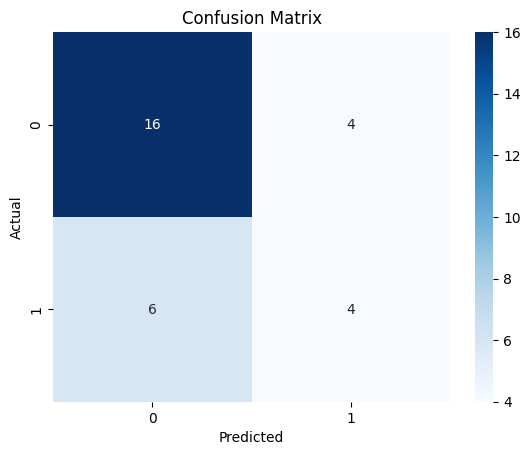

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define features and target
x = data.drop(['Attribution_Binary'], axis=1)
y = data['Attribution_Binary']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=80, verbose=1)

# Train model
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.5666666666666667
Precision: 0.2857142857142857
Recall: 0.2
F1-Score: 0.23529411764705882


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


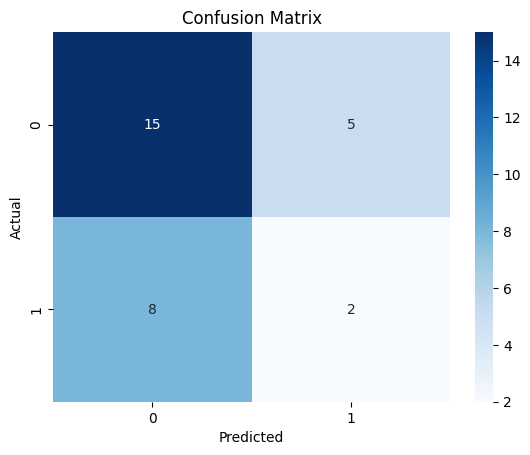

In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize Random Forest
lg_reg = LogisticRegression(max_iter=500)

# Train model
lg_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lg = lg_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Precision:", precision_score(y_test, y_pred_lg))
print("Recall:", recall_score(y_test, y_pred_lg))
print("F1-Score:", f1_score(y_test, y_pred_lg))

# Confusion matrix visualization
cm_lg = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(cm_lg, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step 6 - Employee Performance Prediction Model

R-squared (R²): 0.7110820069565822
Mean Squared Error (MSE): 6.1792335762161


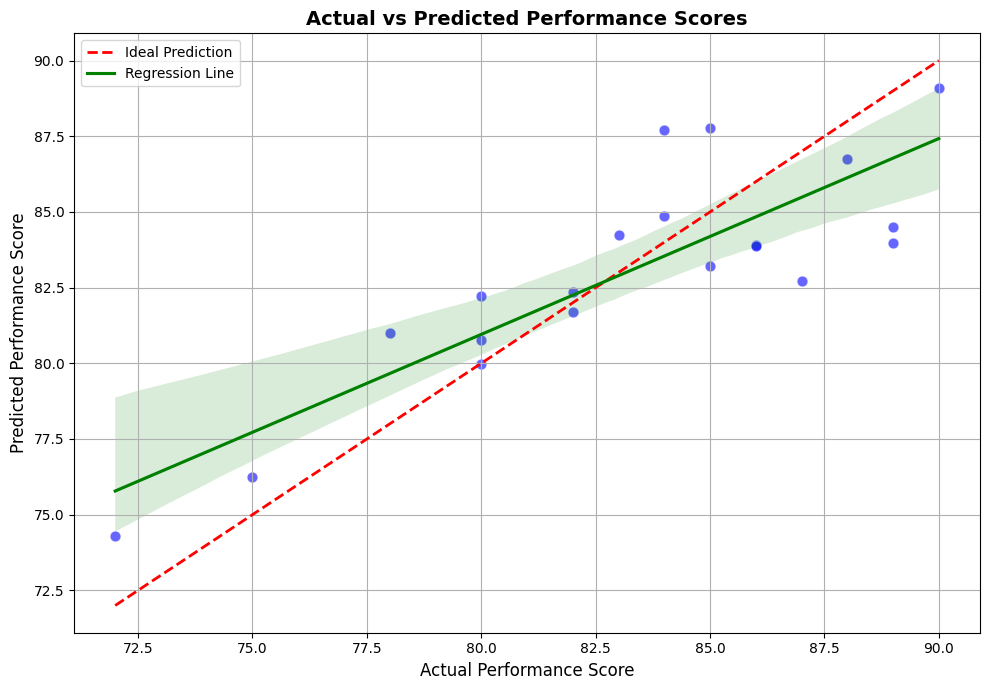

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features and target
X = data.drop(['PerformanceScore'], axis=1)
y = data['PerformanceScore']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Initialize Random Forest
lr_clf = LinearRegression()

# Train model
lr_clf.fit(X_train, y_train)

# Predict on test set
y_pred = lr_clf.predict(X_test)

# Evaluate
print("R-squared (R²):", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Visualize
# Scatter plot with density, regression, and error lines
plt.figure(figsize=(10, 7))

# Scatter points
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", s=60, edgecolor='w')

# Identity line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

# Trend line (actual model fit)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Regression Line')

# Titles and labels
plt.xlabel("Actual Performance Score", fontsize=12)
plt.ylabel("Predicted Performance Score", fontsize=12)
plt.title("Actual vs Predicted Performance Scores", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Phase 3 - Deep Learning Models

### Step 7 - Deep Learning for Employee Performance Prediction

In [32]:
data['Department_HR'] = data['Department_HR'].map({True: 1, False: 0})
data['Department_Marketing'] = data['Department_Marketing'].map({True: 1, False: 0})
data['Department_Sales'] = data['Department_Sales'].map({True: 1, False: 0})

In [33]:
data.head()

,Age,Salary,YearsAtCompany,PerformanceScore,Attribution_Binary,Department_HR,Department_Marketing,Department_Sales
0,29,55000,3,80,0,0,0,1
1,35,60000,7,85,0,1,0,0
2,40,80000,10,95,1,0,0,0
3,28,65000,5,78,0,0,1,0
4,50,75000,20,88,1,0,0,1


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_squared_error

In [35]:
# Define features and target
X = data.drop(["PerformanceScore"], axis=1)
y = data["PerformanceScore"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 7223.0957 - val_loss: 7272.8340
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7155.1909 - val_loss: 7238.7705
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7083.7793 - val_loss: 7199.3389
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7121.7739 - val_loss: 7153.4141
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7090.6694 - val_loss: 7097.7705
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7054.1636 - val_loss: 7029.4893
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6994.3818 - val_loss: 6947.7559
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6855.7700 - val_loss: 6848.0205
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6566.3745 - val_loss: 6727.5527
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6508.5903 - val_loss: 6582.2744
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6426.0830 - val_loss: 6408.0171
Epoch 1

### Step 8 - Employee Attrition Analysis with Deep Learning

In [36]:
data

,Age,Salary,YearsAtCompany,PerformanceScore,Attribution_Binary,Department_HR,Department_Marketing,Department_Sales
0,29,55000,3,80,0,0,0,1
1,35,60000,7,85,0,1,0,0
2,40,80000,10,95,1,0,0,0
3,28,65000,5,78,0,0,1,0
4,50,75000,20,88,1,0,0,1
...,...,...,...,...,...,...,...,...
95,29,53000,3,79,0,1,0,0
96,40,91000,13,92,1,0,0,0
97,45,75000,16,89,0,0,0,1
98,50,70000,21,87,1,1,0,0


In [37]:
# Define features and target
X = data.drop(columns=["Attribution_Binary"])
y = data["Attribution_Binary"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=1)

# Predict on test set
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"\nModel Evaluation Metrics:")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1-Score :  {f1:.4f}")

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.6729 - loss: 0.6756 - val_accuracy: 0.5625 - val_loss: 0.6610
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7333 - loss: 0.6313 - val_accuracy: 0.6250 - val_loss: 0.6472
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7063 - loss: 0.6246 - val_accuracy: 0.6875 - val_loss: 0.6428
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7312 - loss: 0.5990 - val_accuracy: 0.6875 - val_loss: 0.6383
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7417 - loss: 0.5918 - val_accuracy: 0.6875 - val_loss: 0.6363
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7125 - loss: 0.5809 - val_accuracy: 0.6875 - val_loss: 0.6365
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6750 - loss: 0.6022 - val_accuracy: 0.6875 - val_loss: 0.6365
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7479 - loss: 0.5844 - val_accuracy: 0.6875 - val_loss: 0.6388
Epo

# Phase 4 - Reporting and Insights

### Step 10 - Data Visualization and Reporting

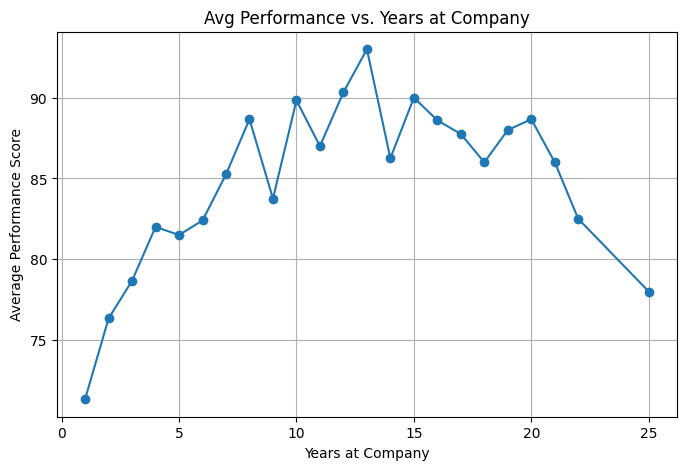

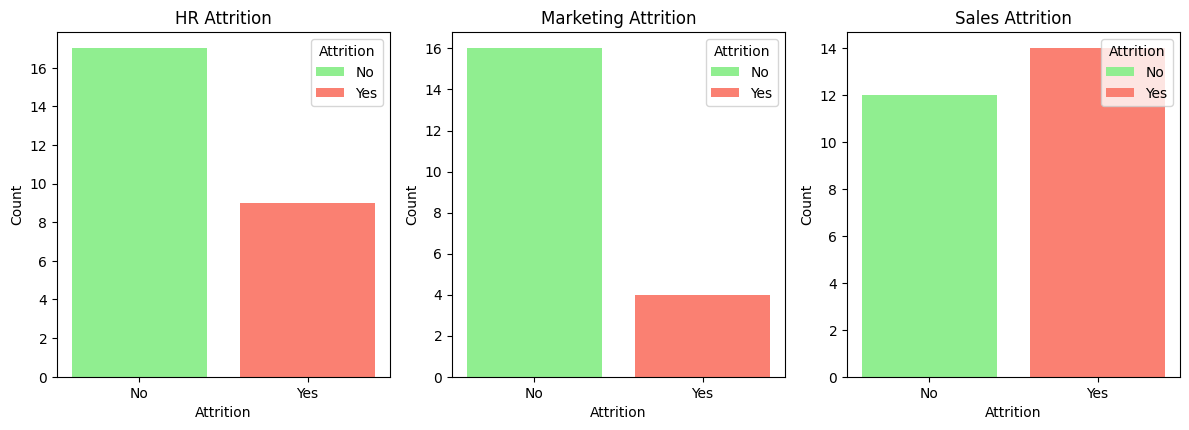

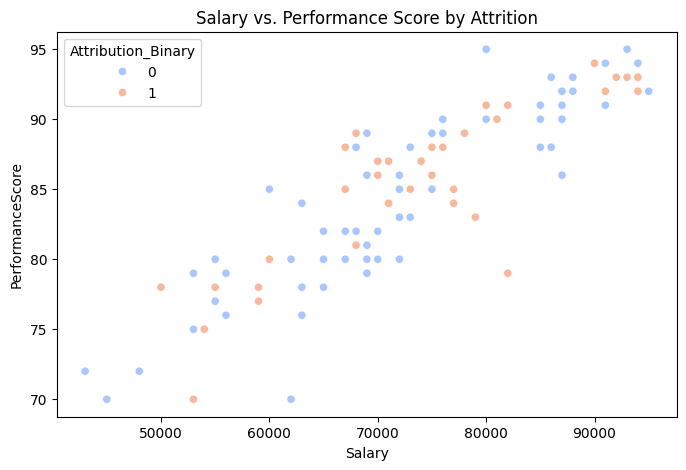

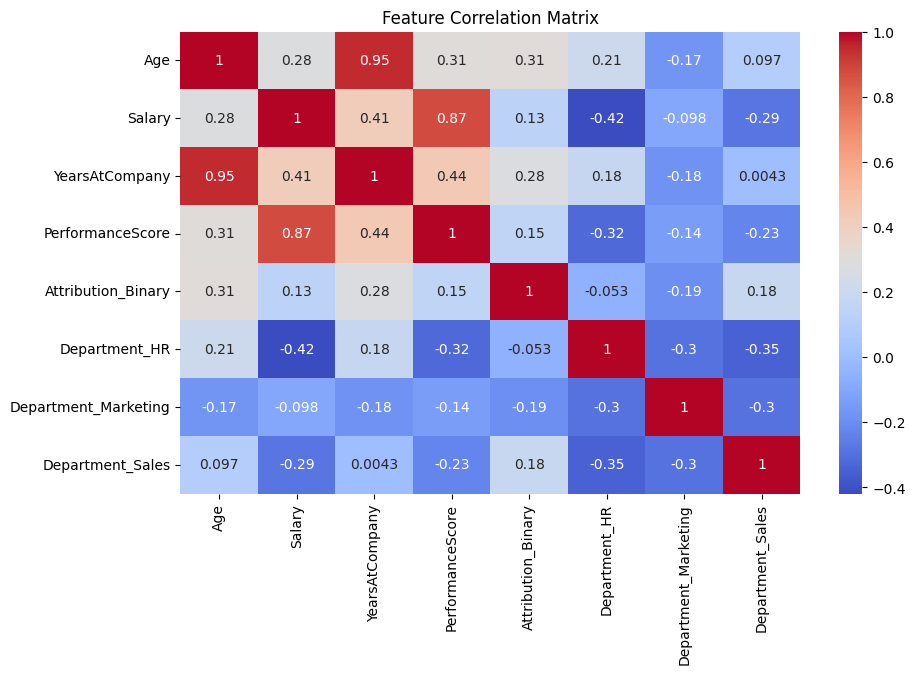

In [38]:
# Line Plot: Average Performance Score by Years at Company
plt.figure(figsize=(8,5))
data.groupby("YearsAtCompany")["PerformanceScore"].mean().plot(marker='o')
plt.title("Avg Performance vs. Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Performance Score")
plt.grid(True)
plt.show()

# List of one-hot encoded department columns
departments = ['Department_HR', 'Department_Marketing', 'Department_Sales']


# Create subplots
plt.figure(figsize=(12, 8))

for i, dept in enumerate(departments, 1):
    plt.subplot(2, 3, i)

    # Filter data for this department
    dept_df = data[data[dept] == 1]

    # Count 0 (No) and 1 (Yes) in Attrition column
    counts = dept_df['Attribution_Binary'].value_counts().sort_index()

    # Create bar plot
    bars = plt.bar(['No', 'Yes'], counts.values, color=['lightgreen', 'salmon'])

    # Title and labels
    plt.title(dept.replace('Department_', '') + ' Attrition')
    plt.xlabel('Attrition')
    plt.ylabel('Count')

    # Legend
    plt.legend(bars, ['No', 'Yes'], title="Attrition")

plt.tight_layout()
plt.show()
# Scatter Plot: Salary vs. Performance Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="Salary", y="PerformanceScore", hue="Attribution_Binary", palette='coolwarm')
plt.title("Salary vs. Performance Score by Attrition")
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [39]:
data['Attribution_Binary'].value_counts()

,count
Attribution_Binary,
0,61
1,39
